In [28]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
sns.set_style('whitegrid')
%matplotlib inline
from pandas_datareader import data,wb
df = pd.read_pickle('all_banks')

In [14]:
df.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker           ...     MS                                  WFC         \
Stock Info    Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date                  ...                                                      
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.60  31.98   
2006-01-04   1871020  ...  58.70  59.28  58.35  58.35  7977800  31.80  31.82   
2006-01-05   1143160  ...  58.55  58.59  58.02  58.51  5778000  31.50  31.56   
2006-01-06   1370250  ...  58.77  58.85  58.05  58.57  6889800  31.58  31.78   
2006-01-09   1680740  ...  58.63  59.29  58.62  59.19  4144500  31.68  31.82   

Bank Ticker                          
Stock Info     Low  Close    Volume  
Date                                 
2006-01-03   31.20  31.90  11016400  
2006-01-04   31.36  31.53  10871000  
2006-01-05   31.31  31.50  10158000  
2006-01-06   31.38  31.68   8403800  
2006-01-09   31.56  31.68   5619600  

[5 rows x 30 columns]

In [2]:
df['BAC'].head()

Stock Info,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,46.92,47.18,46.15,47.08,16296700
2006-01-04,47.00,47.24,46.45,46.58,17757900
2006-01-05,46.58,46.83,46.32,46.64,14970900
2006-01-06,46.80,46.91,46.35,46.57,12599800
2006-01-09,46.72,46.97,46.36,46.60,15620000


In [3]:
#Settinng a start and end variable for the length of analysis
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)

In [4]:
#Using pandas_DataReader we are able to use Yahoo finance to get stock information and create a dataframe
BAC = data.DataReader('BAC','yahoo',start,end)

In [5]:
BAC

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,47.180000,46.150002,46.919998,47.080002,16296700.0,34.425114
2006-01-04,47.240002,46.450001,47.000000,46.580002,17757900.0,34.059509
2006-01-05,46.830002,46.320000,46.580002,46.639999,14970700.0,34.103382
2006-01-06,46.910000,46.349998,46.799999,46.570000,12599800.0,34.052204
2006-01-09,46.970001,46.360001,46.720001,46.599998,15619400.0,34.074108
...,...,...,...,...,...,...
2015-12-24,17.379999,17.219999,17.320000,17.270000,29369400.0,15.574412
2015-12-28,17.230000,16.980000,17.219999,17.129999,41777500.0,15.448163
2015-12-29,17.350000,17.160000,17.250000,17.280001,45670400.0,15.583436


In [6]:
# CitiGroup
C = data.DataReader("C", 'yahoo', start, end)

In [7]:
# Goldman Sachs
GS = data.DataReader("GS", 'yahoo', start, end)

In [8]:
# JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', start, end)

In [9]:
# Morgan Stanley
MS = data.DataReader("MS", 'yahoo', start, end)

In [10]:
# Wells Fargo
WFC = data.DataReader("WFC", 'yahoo', start, end)

In [11]:
#Creating a list of ticker symbols in alphabetical order
tickers = ['BAC','C','GS','JPM','MS','WFC']

In [12]:
#Using pandas to concatenate all dataframes along the same column
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC], axis=1,keys=tickers)

In [36]:
bank_stocks

BAC                                                          \
                 High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  34.425114   
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  34.059509   
2006-01-05  46.830002  46.320000  46.580002  46.639999  14970700.0  34.103382   
2006-01-06  46.910000  46.349998  46.799999  46.570000  12599800.0  34.052204   
2006-01-09  46.970001  46.360001  46.720001  46.599998  15619400.0  34.074108   
...               ...        ...        ...        ...         ...        ...   
2015-12-24  17.379999  17.219999  17.320000  17.270000  29369400.0  15.574412   
2015-12-28  17.230000  16.980000  17.219999  17.129999  41777500.0  15.448163   
2015-12-29  17.350000  17.160000  17.250000  17.280001  45670400.0  15.583436   
2015-12-30  17.240000  17.040001  17.200001  17.049999  35066400.0  15.376013   
2015-12-31  17.070000  16.830000  17.010000  16.830000  47153000.0  15.177611   

                     C                                      ...         MS  \
                  High         Low        Open       Close  ...       Open   
Date                                                        ...              
2006-01-03  493.799988  481.100006  490.000000  492.899994  ...  57.169998   
2006-01-04  491.000000  483.500000  488.600006  483.799988  ...  58.700001   
2006-01-05  487.799988  484.000000  484.399994  486.200012  ...  58.549999   
2006-01-06  489.000000  482.000000  488.799988  486.200012  ...  58.770000   
2006-01-09  487.399994  483.000000  486.000000  483.899994  ...  58.630001   
...                ...         ...         ...         ...  ...        ...   
2015-12-24   52.970001   52.450001   52.480000   52.709999  ...  32.570000   
2015-12-28   52.570000   51.959999   52.570000   52.380001  ...  32.360001   
2015-12-29   53.220001   52.740002   52.759998   52.980000  ...  32.439999   
2015-12-30   52.939999   52.250000   52.840000   52.299999  ...  32.500000   
2015-12-31   52.389999   51.750000   52.070000   51.750000  ...  31.910000   

                                                   WFC                        \
                Close     Volume  Adj Close       High        Low       Open   
Date                                                                           
2006-01-03  58.310001  5377000.0  36.786667  31.975000  31.195000  31.600000   
2006-01-04  58.349998  7977800.0  36.811905  31.820000  31.365000  31.799999   
2006-01-05  58.509998  5778000.0  36.912865  31.555000  31.309999  31.500000   
2006-01-06  58.570000  6889800.0  36.950710  31.775000  31.385000  31.580000   
2006-01-09  59.189999  4144500.0  37.341850  31.825001  31.555000  31.674999   
...               ...        ...        ...        ...        ...        ...   
2015-12-24  32.480000  2798200.0  28.555326  55.090000  54.709999  54.970001   
2015-12-28  32.169998  5420300.0  28.282784  54.779999  54.169998  54.549999   
2015-12-29  32.549999  6388200.0  28.616871  55.349998  54.990002  55.110001   
2015-12-30  32.230000  5057200.0  28.335531  55.310001  54.790001  55.270000   
2015-12-31  31.809999  8154300.0  27.966284  54.950001  54.220001  54.509998   

                                              
                Close      Volume  Adj Close  
Date                                          
2006-01-03  31.900000  11016400.0  20.658106  
2006-01-04  31.530001  10870000.0  20.418499  
2006-01-05  31.495001  10158000.0  20.395836  
2006-01-06  31.680000   8403800.0  20.515644  
2006-01-09  31.674999   5619600.0  20.512400  
...               ...         ...        ...  
2015-12-24  54.820000   4999400.0  46.234390  
2015-12-28  54.680000   8288800.0  46.116322  
2015-12-29  55.290001   7894900.0  46.630783  
2015-12-30  54.889999   8016900.0  46.293434  
2015-12-31  54.360001  10929800.0  45.846439  

[2517 rows

In [13]:
#Creating column names
bank_stocks.columns.names = ['Bank Ticker', 'Stock Info']

In [14]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   34.425114  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   34.059509  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   34.103382  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   34.052204  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   34.074108  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  36.786667  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  36.811905  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  36.912865  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  36.950710  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  37.341850  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.658106  
2006-01-04   31.799999  31.530001  10870000.0  20.418499  
2006-01-05   31.500000  31.495001  10158000.0  20.395836  
2006-01-06   31.580000  31.680000   8403800.0  20.515644  
2006-01-09   31.674999  31.674999   5619600.0  20.512400  

[5 rows x 36 columns]

In [15]:
#Getting the max close prics for each banks stock
bank_stocks.xs(key = 'Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

In [16]:
#Creating a new DataFrame for the returns on each banks stock
returns = pd.DataFrame()

In [17]:
#Iterating through each bank and comparing it to previous days to see the % change
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()

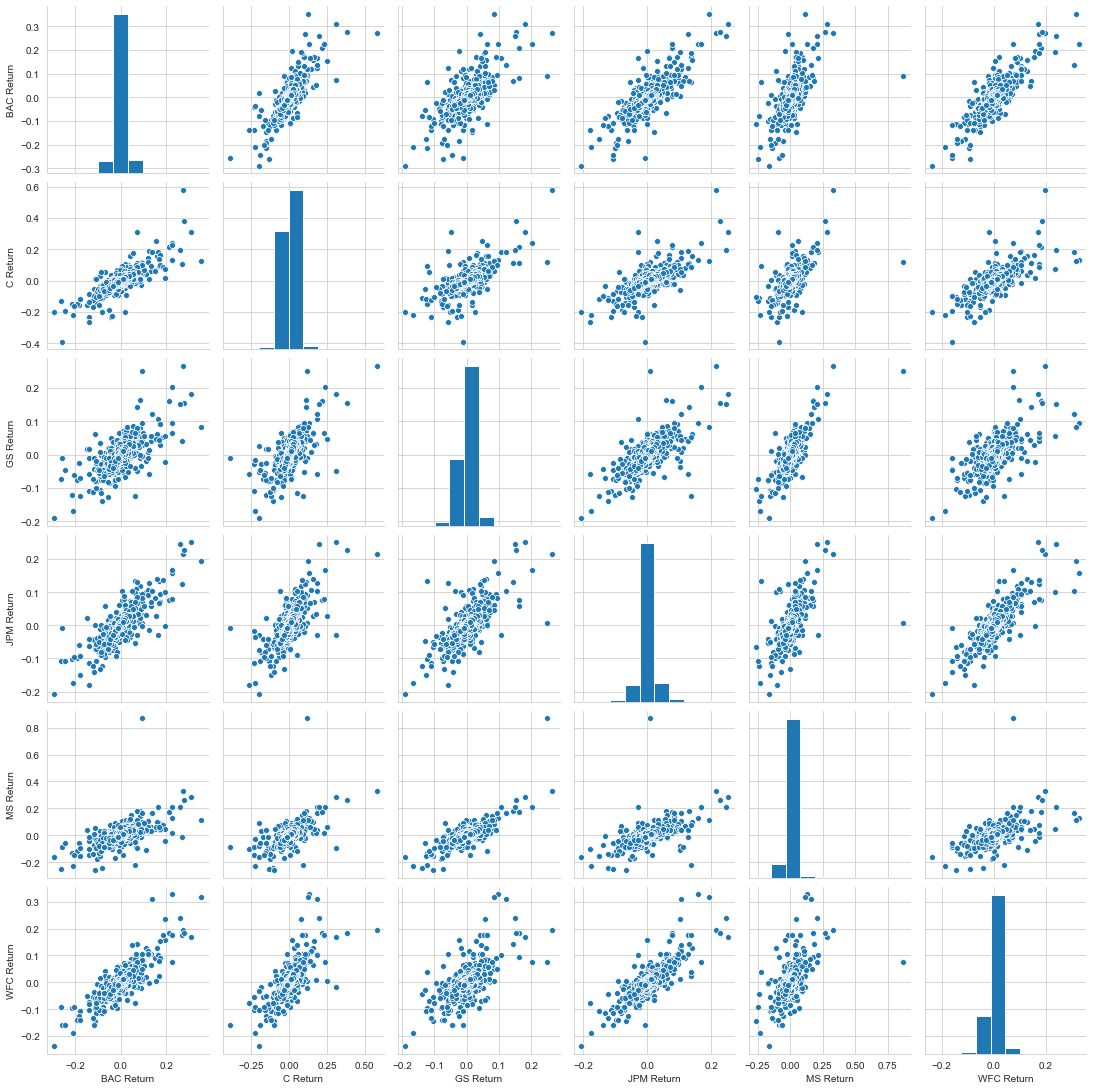

In [18]:
#Creating a pairplot for data insight
sns.pairplot(returns[1:])

In [19]:
#Getting the dates of each banks minimum return
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [20]:
#Getting the dates of each banks maximum return
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [21]:
#Seeing which stock is the riskiest (Looking at st. dev or each banstock)
returns.std()

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

In [22]:
#Checking the samme as above, but for 2015
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

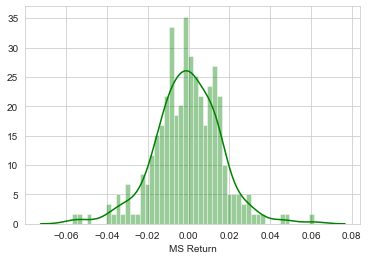

In [23]:
#Looking at distribution of returns for Morgan Stanley in 2015
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'],color = 'green',bins=50)

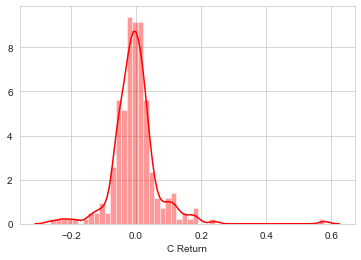

In [24]:
#Looking at distributions of returns for CitiGroup for 2008 (Financial Crisis)
sns.distplot(returns.loc['2008-01-01':'2008-12-31']["C Return"],color = 'red',bins = 50)

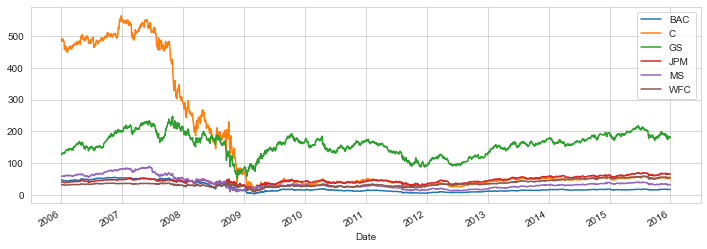

In [25]:
#Creating a lineplot showing close prices for each bank over the whole period of time (iteration)
for tick in tickers:
    bank_stocks[tick]['Close'].plot(label=tick,figsize=(12,4))
plt.legend()

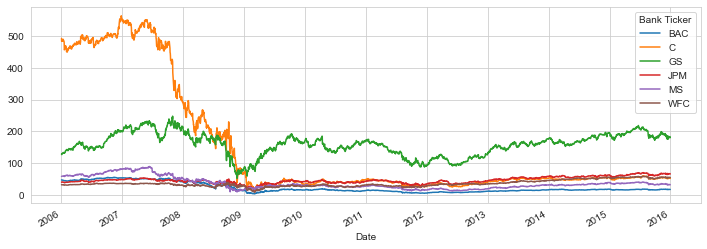

In [26]:
#Creating a lineplot showing close prices for each bank over the whole period of time (ix method)
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot(label=tick,figsize=(12,4))

In [29]:
#Creating the same plot but using iplot() to make it interactive
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

<Figure size 864x288 with 0 Axes>

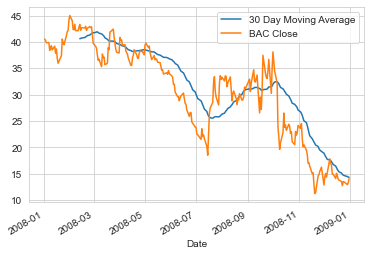

<Figure size 864x288 with 0 Axes>

In [30]:
#Creating a graph showing the moving average against the closing stock price for Bank of Americs
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Moving Average')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC Close')
plt.legend()
plt.figure(figsize = (12,4))

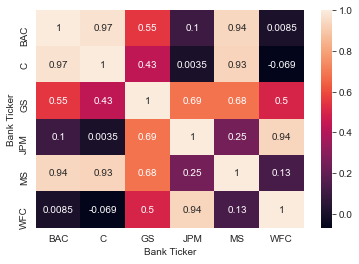

In [31]:
#Creating a heatmap of the correlation between the stocks closing price
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

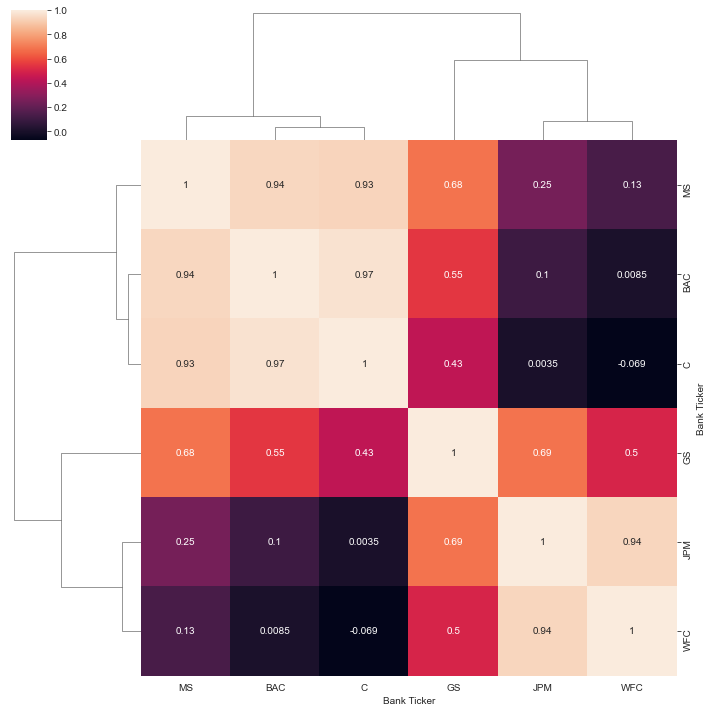

In [32]:
#Creating a clustermap to see how each bank correlated to eachother
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [33]:
#Creating a new DataFrame in matrix format
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()

In [34]:
#Cufflinks not working so well with connecting pandas to seaborn
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

In [36]:
#Creating a candlestick plot for Bank of America's stock
BAC[['Open','High','Low','Close']].iplot(kind='candle')

In [40]:
#Making a moving averages plot for Wells Fargo in 2015, with multiple periods
WFC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[12,21,55])

In [41]:
#Seeing st deviation of a stock price through time
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')